데이터 전처리

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("학습셋 이미지 수: %d개" % (X_train.shape[0])) 
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


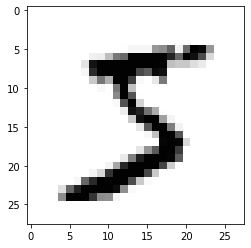

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [7]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [8]:
X = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
print("class: %d " % (y_train[0]))

class: 5 


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


MNIST 딥러닝 기본프레임

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [16]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, 
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.17873, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.17873 to 0.13051, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13051 to 0.11053, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11053 to 0.09739, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09739 to 0.09121, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09121 to 0.08493, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss did not improve from 0.08493

Epoch 8: val_loss improved from 0.08493 to 0.08412, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08412 to 0.07877, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.07877

Epoch 11: val_loss improved from 0.07877 to 0.07860, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss improved from 0.07860 to 0.07707, saving model to ./MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.07

In [22]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9819

 Test Accuracy: 0.9819


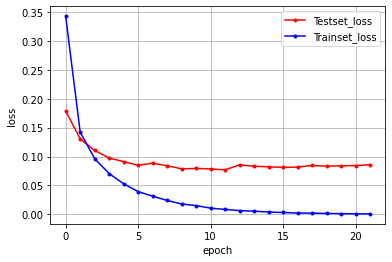

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

MNIST 컨볼루션 신경망 (CNN)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
modelpath = "./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [40]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, 
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08190, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08190 to 0.06087, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06087 to 0.05067, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05067 to 0.04654, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04654 to 0.04397, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04397

Epoch 7: val_loss did not improve from 0.04397

Epoch 8: val_loss improved from 0.04397 to 0.04314, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04314

Epoch 10: val_loss improved from 0.04314 to 0.04152, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.04152

Epoch 12: val_loss did not improve from 0.04152

Epoch 13: val_loss did not improve from 0.04152

Epoch 14: val_loss did not improve from 0.04152

Epoch 15: val_loss did not improve from 0.04152

Epoch 16: v

In [41]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 7s 22ms/step - loss: 0.0330 - accuracy: 0.9918

 Test Accuracy: 0.9918


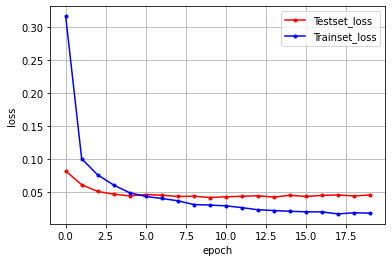

In [42]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()